#Problem Set 3 Q3

###Data Generating Process (Adapted from Ethan's Code)

In [31]:
import numpy as np
from numpy.linalg import inv
import scipy.stats as stats
import pandas as pd
from scipy.stats import distributions as iid
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import logistic

## Play with us!
beta = 1     # "Coefficient of interest"
gamma = 1    # Governs effect of u on X
sigma_u = 1  # Note assumption of homoskedasticity
## Play with us!

# Let Z have order ell, and X order 1, with Var([X,Z]|u)=VXZ

ell = 4 # Play with me too!

# Arbitrary (but deterministic) choice for VXZ = [VX Cov(X,Z);
#                                                 Cov(Z,X) VZ]
# Pinned down by choice of a matrix A...
A = np.sqrt(1/np.arange(1,(ell+1)**2+1)).reshape((ell+1,ell+1)) 

## Below here we're less playful.

# Now Var([X,Z]|u) is constructed so guaranteed pos. def.
VXZ = A.T@A 

Q = -VXZ[1:,[0]]  # -EZX', or generally Edgj/db'

# Gimme some truth:
truth = (beta,gamma,sigma_u,VXZ)

## But play with Omega if you want to introduce heteroskedascity
Omega = (sigma_u**2)*VXZ[1:,1:] # E(Zu)(u'Z')

# Asymptotic variance of optimally weighted GMM estimator:
AVar_b = inv(Q.T@inv(Omega)@Q)

AVar_b

array([[0.73115728]])

Now code to generate $N$ realizations of $(y,X,Z)$ given some &ldquo;truth&rdquo;
`(beta,gamma,sigma_u,VXZ)`:

In [ ]:
from scipy.stats import distributions as iid

def dgp(N,beta,gamma,sigma_u,VXZ):
    """Generate a tuple of (y,X,Z).

    Satisfies model:
        y = X@beta + u
        E Z'u = 0
        Var(u) = sigma^2
        Cov(X,u) = gamma*sigma_u^2
        Var([X,Z]|u) = VXZ
        u,X,Z mean zero, Gaussian

    Each element of the tuple is an array of N observations.

    Inputs include
    - beta :: the coefficient of interest
    - gamma :: linear effect of disturbance on X
    - sigma_u :: Variance of disturbance
    - VXZ :: Var([X,Z]|u)
    """
    
    u = iid.norm.rvs(size=(N,1))*sigma_u

    # "Square root" of VXZ via eigendecomposition
    lbda,v = np.linalg.eig(VXZ)
    SXZ = v@np.diag(np.sqrt(lbda))

    # Generate normal random variates [X*,Z]
    XZ = iid.norm.rvs(size=(N,VXZ.shape[0]))@SXZ.T

    # But X is endogenous...
    X = XZ[:,[0]] + gamma*u
    Z = XZ[:,1:]

    # Calculate y
    y = X*beta + u

    return y,X,Z

#Estimation

In [ ]:
import numpy as np
from numpy.linalg import inv

def gj(b,y,X,Z):
    """Observations of g_j(b).

    This defines the deviations from the predictions of our model; i.e.,
    e_j = Z_ju_j, where EZ_ju_j=0.

    Can replace this function to testimate a different model.
    """
    return Z*(y - X*b)

In [ ]:
#Code I found online 

#general formula for the nth sample moment   
def sample_moment(sample, n):       
  summed = np.sum([el**n for el in sample])       
  length = len(sample)       
  return 1/length * summed    
#function to estimate parameters k and theta   
def estimate_pars(sample):       
  m1 = sample_moment(sample, 1)       
  m2 = sample_moment(sample, 2)       
  k = m1**2/(m2 - m1**2)       
  theta = m2/m1 - m1       
  return k, theta

Lucy's Code

In [ ]:
# Step 1: The DGP
# note that we need 2N
def dgp(true_alphas, N):
    alpha1, alpha2 = true_alphas
    wage = iid.pareto(5).rvs(size=(N,1))
    p_1 = iid.norm(10,2).rvs(size=(N,1))
    p_2 = iid.gamma(3,2).rvs(size=(N,1)) + 10
    
    # create x from these draws, with noise
    x_1 = (wage/(p_1*alpha1))**(1/(alpha1-1)) + iid.norm(scale=2).rvs(size=(N,1))
    x_2 = (wage/(p_2*alpha2))**(1/(alpha2-1)) + iid.norm(scale=2).rvs(size=(N,1))
    
    return (x_1, x_2, p_1, p_2, wage)

In [ ]:
def generate_distribution(mean, n, k):
    # Generate a random distribution using the normal distribution
    distribution = stats.norm.rvs(loc=mean, scale=1, size=n)
    
    # Calculate the  moments
    moments = []
    for i in range(k):
        #for all even moments: E(x-u)^m = s^m (m-1)!! where !! is the double factorial
        if i % 2 == 0:
            moments.append()
        #for all odd moments 
        else:
            moments.append(np.power(distribution, i).mean() - mean ** i
                           
    return distribution

First define a data generation process

In [22]:
#Double factorial found online -import the factorial2 function
from scipy.special import factorial2

#test - works
print(factorial2(5, exact=True))

15


In [ ]:
Second, generate an estimator

In [ ]:
#Define a function that takes data and number of moments in and calculates a p-value
def normaltest(data, K)
    

In [ ]:
Test data

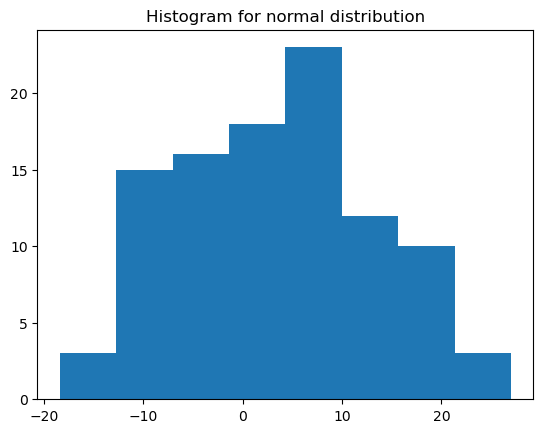

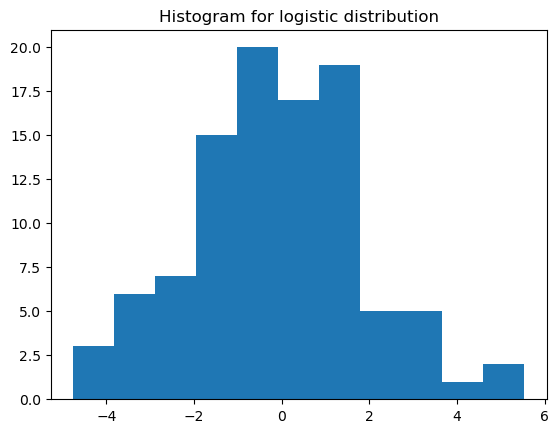

In [32]:
#Normal distribution for testing - this should work
normal= iid.norm.rvs(loc=5, scale=10, size=100)

#logistic distribution - should NOT work
logistic=logistic.rvs(size=100)

#Plot histograms to confirm we have the distributions we want
_=plt.hist(normal, bins='auto')
plt.title("Histogram for normal distribution")
plt.show()
          
_=plt.hist(logistic, bins='auto')
plt.title("Histogram for logistic distribution")
plt.show()

In [34]:
#run tests
print("Tests on normal distribution")
print(normaltest(normal, 1))
print(normaltest(normal, 2))  
print(normaltest(normal, 3))  
print(normaltest(normal, 4))
print(normaltest(normal, 5))
print("Tests on logistic distribution")
print(normaltest(logistic, 1))
print(normaltest(logistic, 2))  
print(normaltest(logistic, 3))  
print(normaltest(logistic, 4))
print(normaltest(logistic, 5))

Tests on normal distribution


NameError: name 'normaltest' is not defined

In [ ]:
"